## **Data Collection & Preprocessing**

In [1]:
import os
import pandas as pd
import kagglehub

In [2]:
dataset_path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", dataset_path)

100%|██████████| 1.25M/1.25M [00:00<00:00, 89.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jessemostipak/hotel-booking-demand/versions/1


In [3]:
print("Files in dataset folder:", os.listdir(dataset_path))

Files in dataset folder: ['hotel_bookings.csv']


In [4]:
csv_file_path = os.path.join(dataset_path, "hotel_bookings.csv")
df = pd.read_csv(csv_file_path)

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.fillna(0, inplace=True)

In [8]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

## **Analytics & Reporting**

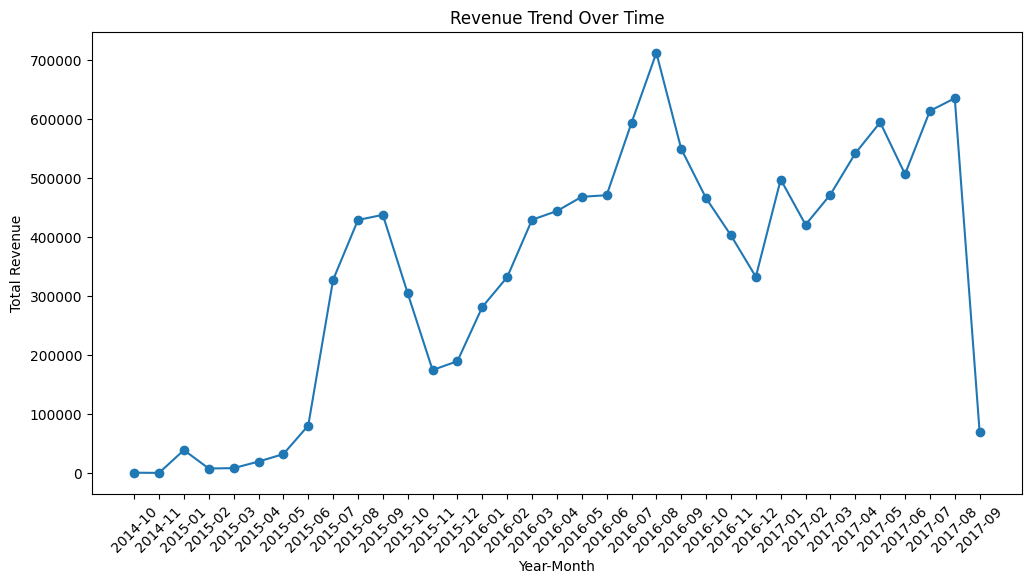

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df["revenue"] = df["adr"] * df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

df["year_month"] = df["reservation_status_date"].dt.to_period("M")

revenue_trend = df.groupby("year_month")["revenue"].sum()

plt.figure(figsize=(12, 6))
plt.plot(revenue_trend.index.astype(str), revenue_trend.values, marker="o")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.title("Revenue Trend Over Time")
plt.xticks(rotation=45)
plt.show()

In [10]:
cancellation_rate = df["is_canceled"].mean() * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Rate: 37.04%


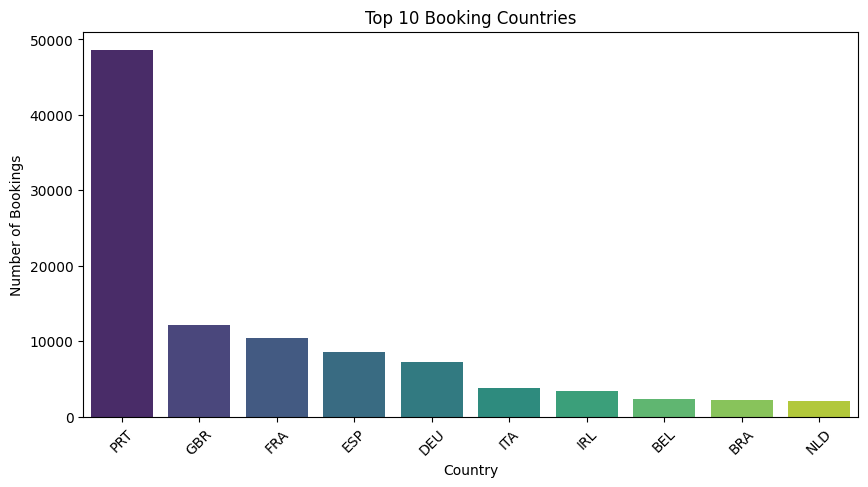

In [12]:
# Count bookings by country
country_counts = df["country"].value_counts().head(10)  # Top 10 countries

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Booking Countries")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.show()

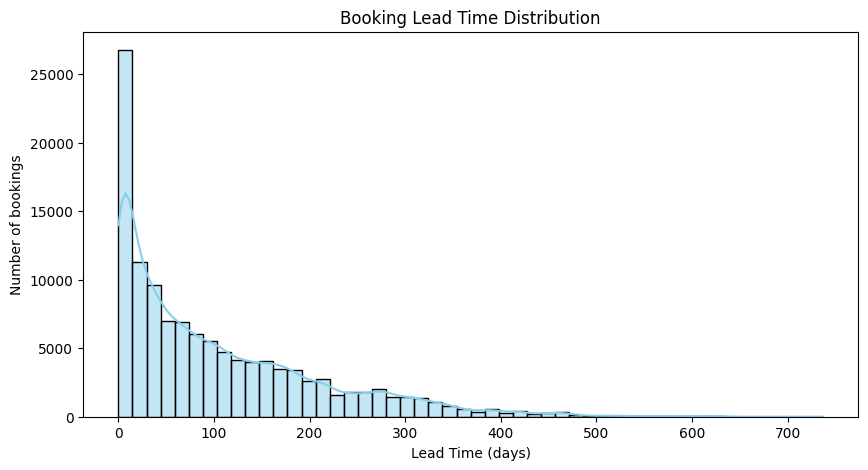

In [14]:
# Plot Distribution of Lead Time

plt.figure(figsize=(10, 5))
sns.histplot(df["lead_time"], bins=50, kde=True, color="skyblue")
plt.title("Booking Lead Time Distribution")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of bookings")
plt.show()

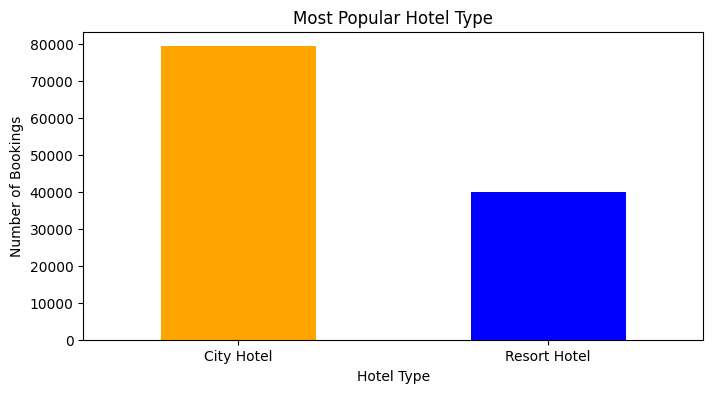

In [15]:
df["hotel"].value_counts().plot(kind="bar", color=["orange", "blue"], figsize=(8, 4))
plt.title("Most Popular Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.show()

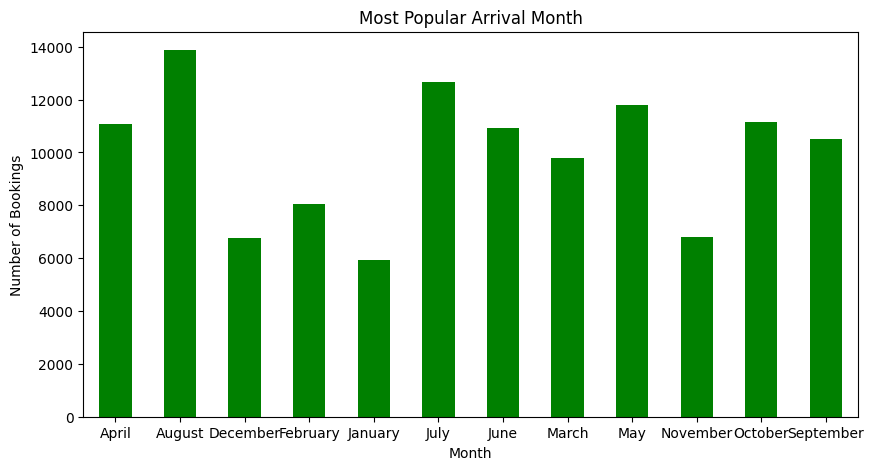

In [16]:
df["arrival_date_month"].value_counts().sort_index().plot(kind="bar", color="green", figsize=(10, 5))
plt.title("Most Popular Arrival Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.show()

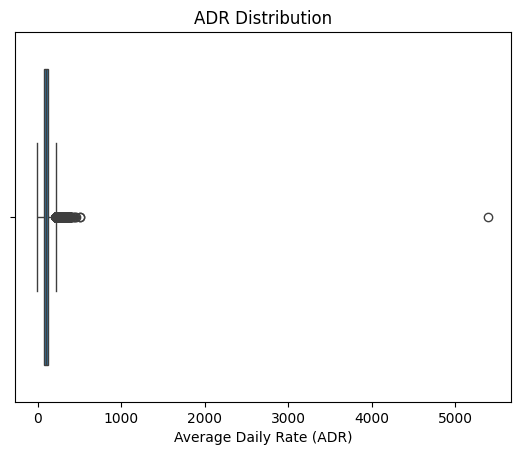

In [17]:
sns.boxplot(x=df["adr"])
plt.title("ADR Distribution")
plt.xlabel("Average Daily Rate (ADR)")
plt.show()

In [18]:
df.to_csv("cleaned_hotel_bookings.csv", index=False)